In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import seaborn as sns #visualisation


In [5]:
# import data set from the local driver


df1=pd.read_csv('drive/My Drive/Colab Notebooks/train1.csv', sep=';' )# , engine='python')
df2=pd.read_csv('drive/My Drive/Colab Notebooks/train2.csv', sep=';' )
df3=pd.read_csv('drive/My Drive/Colab Notebooks/test1.csv', sep=';' )
df4=pd.read_csv('drive/My Drive/Colab Notebooks/test2.csv', sep=';' )

frames = [df1,df2,df3,df4]
df_concat=pd.concat(frames)
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 995400 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [6]:
#df_concat.shape

In [7]:
#df_concat.to_csv(r'/home/jovyan/HAI-HIL dataset.csv',index=False)

In [8]:
# drop the columns that are under attack in each stage.
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)

In [9]:
# make the Timestamp to datetime datatype
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series
df1.head(2)
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0


In [10]:
df1.fillna(method = 'ffill', inplace = True)

In [11]:
# a Timestamp as index
df1= df1.set_index('time')
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


##### Interpolation the data with each time stamp  

In [12]:
# resample the data with 5 second
df1=df1.resample('30s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.086703,399.2321,1110.3986,32.0,0.000477,31.381620,35.794627,0.0,0.284057,...,63.831925,0.0,406.934798,-0.000290,338.821377,335.410637,50.9871,9973.000000,27628.933333,0.0
2019-09-11 20:00:30,0.0983,1.111473,399.2321,1110.3986,32.0,0.000627,32.474047,35.877173,0.0,0.283800,...,68.297292,0.0,412.591937,0.000875,343.762050,342.966943,50.9871,9955.166667,27628.933333,0.0
2019-09-11 20:01:00,0.0983,1.109256,399.2321,1110.3986,32.0,0.001003,31.563708,35.871377,0.0,0.283800,...,68.475707,0.0,407.671447,0.000947,339.465180,341.654010,50.9871,9963.500000,27629.000000,0.0
2019-09-11 20:01:30,0.0983,1.025703,399.2321,1110.3986,32.0,0.000000,32.606467,35.591320,0.0,0.283800,...,33.621480,0.0,319.395020,-0.000367,300.258013,312.008093,50.9871,9971.933333,27628.933333,0.0
2019-09-11 20:02:00,0.0983,0.957073,399.2321,1110.3986,32.0,0.000000,32.143030,35.362557,0.0,0.284053,...,2.820577,0.0,291.483417,-0.000607,291.503297,291.626887,50.9871,9972.200000,27629.000000,0.0


In [13]:
df1.shape

(160020, 60)

In [14]:
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )

P1_B2004      126840
P1_B2016      126840
P1_B3004      126840
P1_B3005      126840
P1_B4002      126840
P1_B4005      126840
P1_B400B      126840
P1_B4022      126840
P1_FCV01D     126840
P1_FCV01Z     126840
P1_FCV02D     126840
P1_FCV02Z     126840
P1_FCV03D     126840
P1_FCV03Z     126840
P1_FT01       126840
P1_FT01Z      126840
P1_FT02       126840
P1_FT02Z      126840
P1_FT03       126840
P1_FT03Z      126840
P1_LCV01D     126840
P1_LCV01Z     126840
P1_LIT01      126840
P1_PCV01D     126840
P1_PCV01Z     126840
P1_PCV02D     126840
P1_PCV02Z     126840
P1_PIT01      126840
P1_PIT02      126840
P1_TIT01      126840
P1_TIT02      126840
P2_24Vdc      126840
P2_Auto       126840
P2_Emgy       126840
P2_On         126840
P2_SD01       126840
P2_SIT01      126840
P2_TripEx     126840
P2_VT01e      126840
P2_VXT02      126840
P2_VXT03      126840
P2_VYT02      126840
P2_VYT03      126840
P3_LCP01D     126840
P3_LCV01D     126840
P3_LH         126840
P3_LL         126840
P3_LT01      

In [15]:
df1.fillna(method = 'ffill', inplace = True)

In [16]:
df1.shape

(160020, 60)

#### Visualize the dataset
-  Plotting the number of normal and Attack transactions in the dataset.  

None


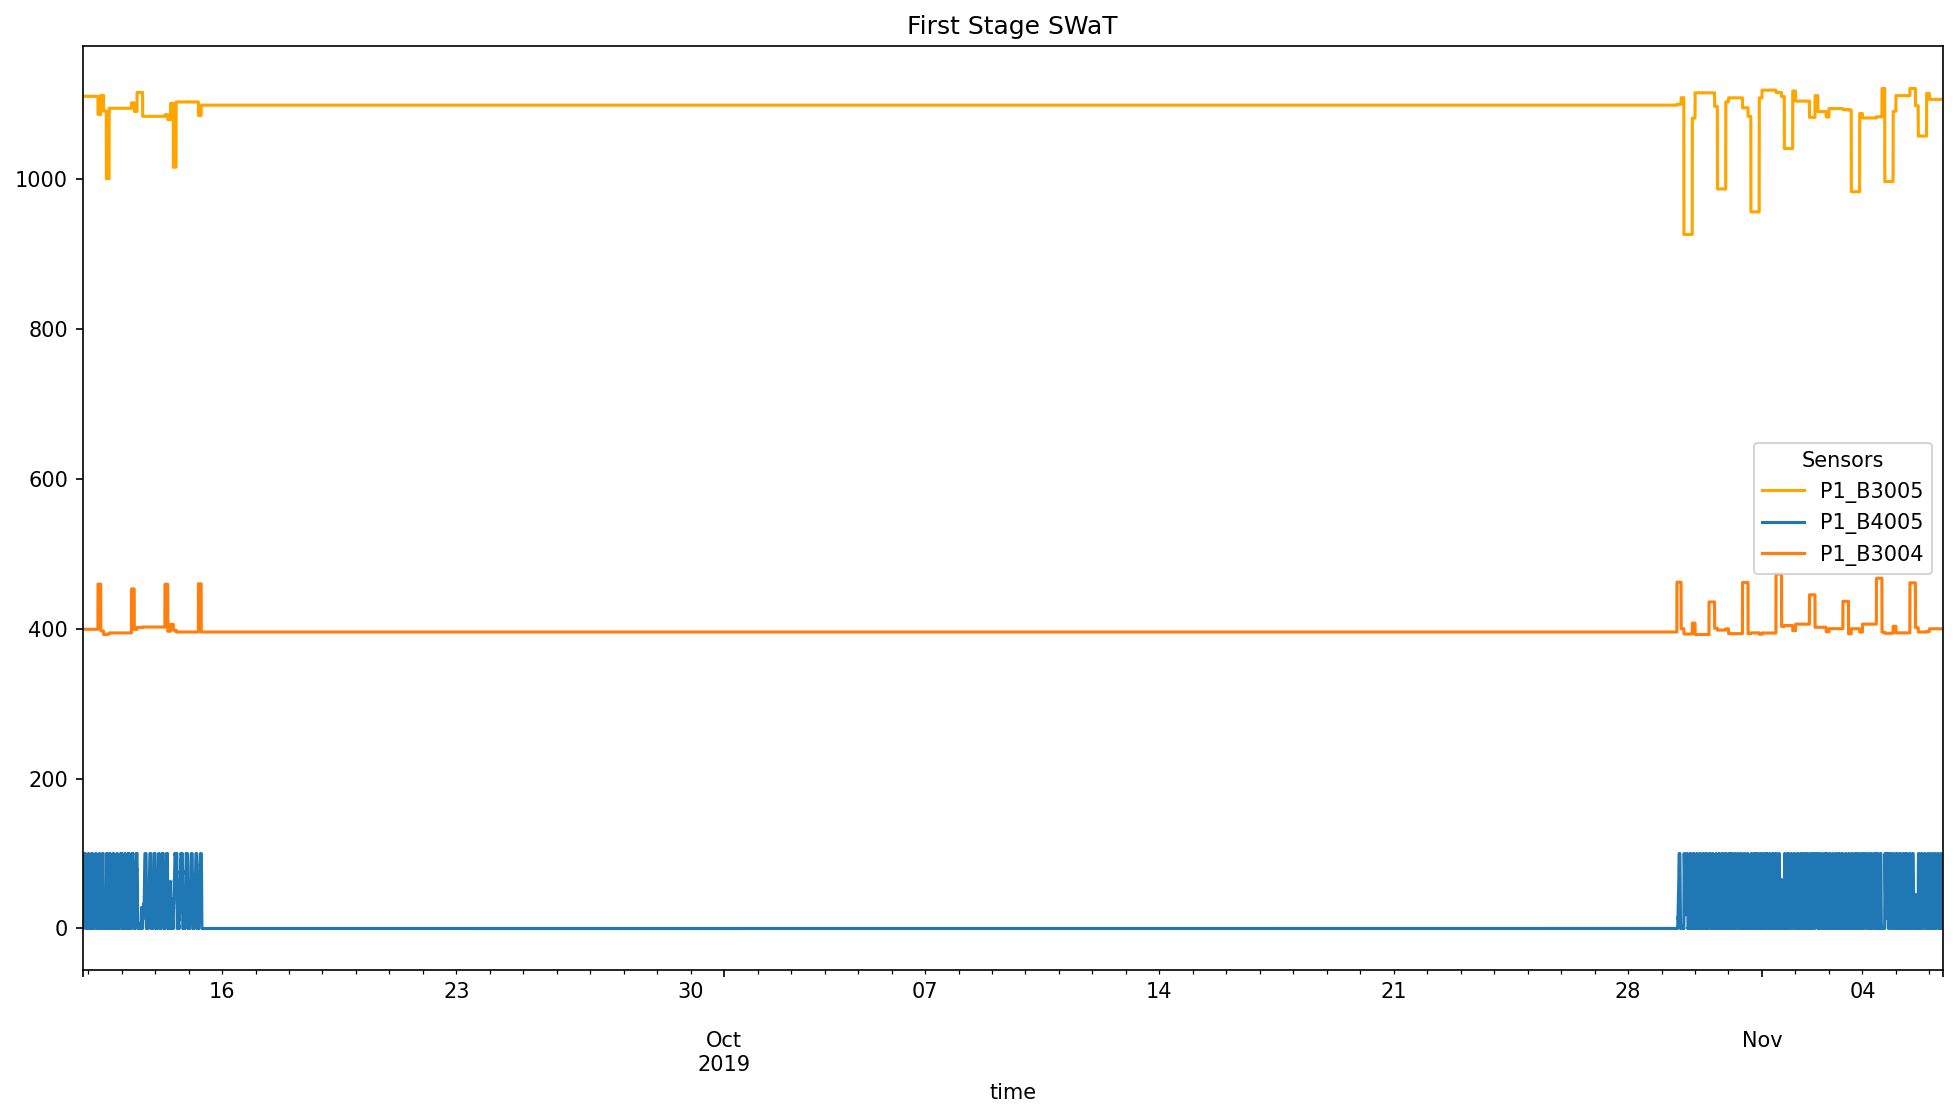

In [17]:
# Visualizing The first stage with respect to time series
def plot ():
    plt.figure(figsize=(16, 8), dpi=150)
    df1['P1_B3005'].plot(label='P1_B3005', color='orange')
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004')
    # adding title to the plot
    plt.title('First Stage SWaT')
    # adding Label to the x-axis
    plt.xlabel('time')
    # adding legend to the curve
    plt.legend(title='Sensors')

print (plot ())


In [18]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

In [19]:
# fill the missing values with forward and backward of the cols

df1=df1.fillna(method="ffill")

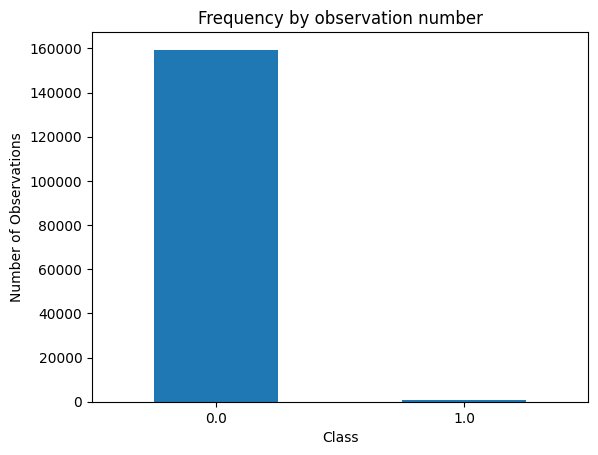

In [20]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [21]:
df1.shape

(160020, 61)

In [22]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and target variable
X = df1.drop('lablel', axis=1)
y = df1['lablel']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,lablel
0,0.0983,1.086703,399.2321,1110.3986,32.0,0.000477,31.381620,35.794627,0.0,0.284057,...,0.0,406.934798,-0.000290,338.821377,335.410637,50.9871,9973.000000,27628.933333,0.0,0.0
1,0.0983,1.111473,399.2321,1110.3986,32.0,0.000627,32.474047,35.877173,0.0,0.283800,...,0.0,412.591937,0.000875,343.762050,342.966943,50.9871,9955.166667,27628.933333,0.0,0.0
2,0.0983,1.109256,399.2321,1110.3986,32.0,0.001003,31.563708,35.871377,0.0,0.283800,...,0.0,407.671447,0.000947,339.465180,341.654010,50.9871,9963.500000,27629.000000,0.0,0.0
3,0.0983,1.025703,399.2321,1110.3986,32.0,0.000000,32.606467,35.591320,0.0,0.283800,...,0.0,319.395020,-0.000367,300.258013,312.008093,50.9871,9971.933333,27628.933333,0.0,0.0
4,0.0983,0.957073,399.2321,1110.3986,32.0,0.000000,32.143030,35.362557,0.0,0.284053,...,0.0,291.483417,-0.000607,291.503297,291.626887,50.9871,9972.200000,27629.000000,0.0,0.0


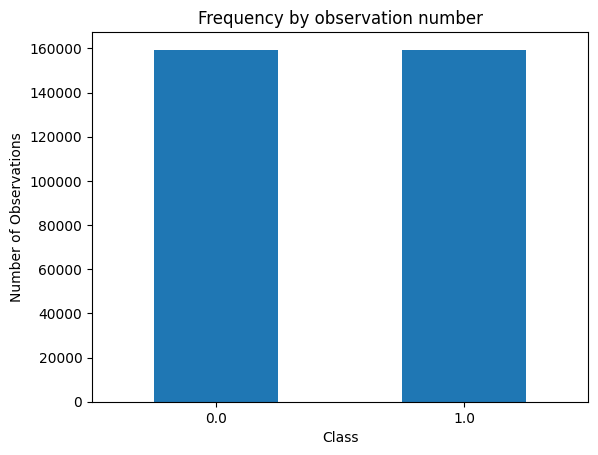

In [23]:
#Visualizing the balanced dataset
count_classes2 = pd.value_counts(df_resampled['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df_resampled['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [24]:
df_resampled.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [25]:
#Count 1 unique values in each columns
df2=df_resampled.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [26]:
# drop the  cols
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0)

# drop two columns name is 'C' and 'D'
df1=df_resampled.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1)

In [27]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c)

Index(['P1_B2004', 'P1_B2016', 'P1_PCV01Z', 'P1_PCV01D', 'P4_ST_LD', 'P4_LD',
       'P4_ST_PO', 'P4_HT_LD', 'P1_B3004', 'P3_LCV01D', 'P4_HT_PO', 'P1_PIT01',
       'P4_HT_FD', 'P4_ST_PT01', 'P1_FT01', 'P1_FT01Z', 'P1_FT02Z', 'P1_B400B',
       'P1_B4005', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FT02', 'P4_ST_FD', 'P1_PIT02',
       'P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02Z', 'P1_LIT01', 'P1_PCV02D',
       'P1_LCV01D', 'P1_LCV01Z', 'P1_FT03', 'P1_B3005', 'P1_FT03Z', 'P4_ST_PS',
       'P1_B4022', 'P3_LCP01D', 'P1_FCV02D', 'P1_FCV02Z', 'P1_TIT02',
       'P1_B4002'],
      dtype='object')


In [29]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']]

In [30]:
df2.shape

(318748, 42)

In [31]:
#To see how the data is spread betwen Attack and Normal
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count())
print(df2.groupby('lablel')['lablel'].count())

lablel
0.0    159374
1.0    159374
Name: lablel, dtype: int64


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318748 entries, 0 to 318747
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   P1_FCV03D   318748 non-null  float64
 1   P1_FCV03Z   318748 non-null  float64
 2   P1_PCV02D   318748 non-null  float64
 3   P1_FT01     318748 non-null  float64
 4   P1_PCV01D   318748 non-null  float64
 5   P1_PCV01Z   318748 non-null  float64
 6   P1_PCV02Z   318748 non-null  float64
 7   P1_B2016    318748 non-null  float64
 8   P1_B2004    318748 non-null  float64
 9   P1_FT01Z    318748 non-null  float64
 10  P4_ST_LD    318748 non-null  float64
 11  P4_ST_PO    318748 non-null  float64
 12  P4_LD       318748 non-null  float64
 13  P3_LCV01D   318748 non-null  float64
 14  P1_PIT01    318748 non-null  float64
 15  P4_ST_PT01  318748 non-null  float64
 16  P4_HT_PO    318748 non-null  float64
 17  P4_HT_LD    318748 non-null  float64
 18  P1_B400B    318748 non-null  float64
 19  P1

#### Normalize using min Max scaler  

In [33]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03']
scaler = MinMaxScaler()
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
0,0.537694,0.535769,0.0,0.179742,0.352795,0.356146,0.028416,0.524037,0.950413,0.380597,...,0.827682,0.988532,1.0,0.194168,0.587595,0.205342,0.024612,0.792713,0.707857,0.0
1,0.538918,0.534423,0.0,0.192590,0.361706,0.356146,0.028416,0.537314,0.950413,0.407648,...,0.826849,0.988413,1.0,0.205032,0.571703,0.209991,0.005457,0.761654,0.693695,0.0
2,0.537602,0.534093,0.0,0.191354,0.371676,0.367126,0.028361,0.536126,0.950413,0.405871,...,0.828213,0.988519,1.0,0.205045,0.591678,0.206908,0.001176,0.779561,0.705838,0.0
3,0.534512,0.534002,0.0,0.185844,0.368128,0.367846,0.028379,0.491339,0.950413,0.394682,...,0.829348,0.988501,1.0,0.197192,0.570190,0.199407,0.184255,0.790213,0.686814,0.0
4,0.532808,0.534006,0.0,0.179704,0.350552,0.353597,0.028379,0.454551,0.950413,0.379422,...,0.827991,0.988584,1.0,0.196575,0.562703,0.195024,0.464389,0.770124,0.683643,0.0


In [34]:
# # Taking a random sample of 20% of the data
# df2 = df2.sample(frac=0.1, random_state=42)
# df2.shape

#### Split the Data to train and Test  

In [35]:
# split the normal data with respect to test and Train
from sklearn.model_selection import train_test_split
x_good_train, x_good_test = train_test_split(df2, test_size=0.2, random_state=42)

In [36]:
print(x_good_train.shape)
print(x_good_test.shape)

(254998, 42)
(63750, 42)


In [37]:
# Training and testing with removing the class
x_good_train = x_good_train[x_good_train.lablel == 0.0] #where normal transactions
x_good_train = x_good_train.drop(['lablel'], axis=1) #drop the class columns

test_y = x_good_test['lablel'] # save the class column for the test set
x_good_test = x_good_test.drop(['lablel'], axis=1) #drop the class column

x_good_train = x_good_train.values #transform to ndarray
x_good_test = x_good_test.values
x_good_train.shape, x_good_test.shape #,x_good_train.shape,test_y.shape

((127410, 41), (63750, 41))

#### Build Model   

In [38]:
#########
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
import datetime

In [39]:
#TIME_STEPS = 288
model = Sequential()
# encoder
model.add(Dense(41, input_dim=x_good_train.shape[1], activation='sigmoid')) # Input layers or encoder sigmoid relu
Dropout(0.01),
model.add(Dense(64, activation='sigmoid')) ##
Dropout(0.01),
model.add(Dense(64, activation='sigmoid')) ##
Dropout(0.01),

# model.add(Dense(41, activation='sigmoid')) ## decoder
# Dropout(0.1),
model.add(Dense(x_good_train.shape[1])) # output layers
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 41)                1722      
                                                                 
 dense_1 (Dense)             (None, 64)                2688      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 41)                2665      
                                                                 
Total params: 11,235
Trainable params: 11,235
Non-trainable params: 0
_________________________________________________________________


### Train the model
Please note that we are using x_good_test as both the input and the target since this is a reconstruction model.

In [40]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100)
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=30,
    batch_size=32,
    validation_data=(x_good_test, x_good_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0])
print('accuracy:', score[1])

Epoch 1/30
3982/3982 - 9s - loss: 0.0539 - accuracy: 0.8309 - val_loss: 0.0615 - val_accuracy: 0.7429 - 9s/epoch - 2ms/step
Epoch 2/30
3982/3982 - 7s - loss: 0.0473 - accuracy: 0.8860 - val_loss: 0.0610 - val_accuracy: 0.7580 - 7s/epoch - 2ms/step
Epoch 3/30
3982/3982 - 7s - loss: 0.0469 - accuracy: 0.8899 - val_loss: 0.0596 - val_accuracy: 0.7548 - 7s/epoch - 2ms/step
Epoch 4/30
3982/3982 - 6s - loss: 0.0458 - accuracy: 0.8988 - val_loss: 0.0567 - val_accuracy: 0.7442 - 6s/epoch - 1ms/step
Epoch 5/30
3982/3982 - 6s - loss: 0.0454 - accuracy: 0.9038 - val_loss: 0.0567 - val_accuracy: 0.7675 - 6s/epoch - 2ms/step
Epoch 6/30
3982/3982 - 8s - loss: 0.0454 - accuracy: 0.9057 - val_loss: 0.0567 - val_accuracy: 0.7702 - 8s/epoch - 2ms/step
Epoch 7/30
3982/3982 - 6s - loss: 0.0454 - accuracy: 0.9061 - val_loss: 0.0567 - val_accuracy: 0.7666 - 6s/epoch - 2ms/step
Epoch 8/30
3982/3982 - 7s - loss: 0.0454 - accuracy: 0.9074 - val_loss: 0.0566 - val_accuracy: 0.7797 - 7s/epoch - 2ms/step
Epoch 9/

#### Plot training and test loss  

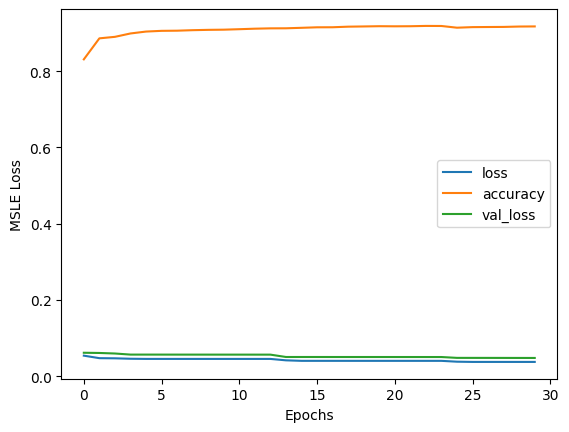

In [41]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['accuracy'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','accuracy', 'val_loss'])
plt.show()

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data.

#### Predictions and Computing Reconstruction Error  

In [42]:
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions,2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df.head()

1993/1993 [==============================] - 2s 929us/step


,Reconstruction_error,A
300453,0.247540,1.0
258530,0.307775,1.0
7696,0.249687,0.0
177325,0.450165,1.0
104886,0.122104,0.0


In [43]:
# find the maximum of each column using reconstruction error
maxValues = error_df.max()

print(maxValues)

Reconstruction_error    0.650936
A                       1.000000
dtype: float64


In [44]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss1 = tf.keras.losses.mse(test_x_predictions, x_good_test)


trainloss1=pd.DataFrame(train_loss1)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False)
trainloss1.describe()


,0
count,63750.000000
mean,0.243452
std,0.126577
min,0.115618
25%,0.122104
50%,0.228688
75%,0.322561
max,0.650936


Text(0.5, 1.0, 'bins - loss distribution = 20')

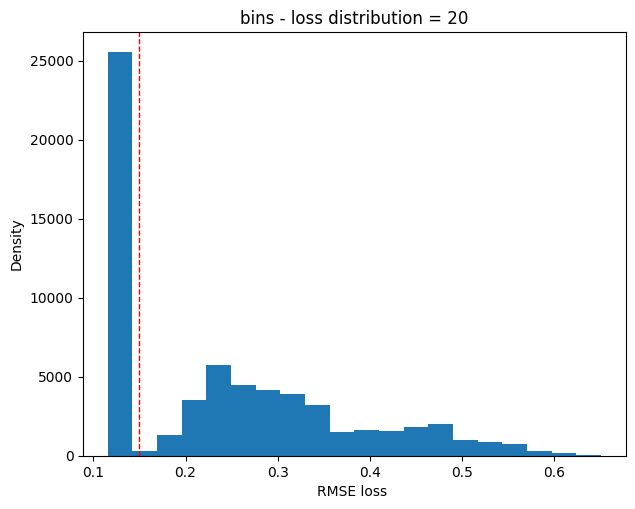

In [45]:
# rules-of-thumb to identify the number of bins Freedman–Diaconis rule
trainloss1=pd.DataFrame(trainloss1)
q1 = trainloss1.quantile(0)
q3 = trainloss1.quantile(1)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(trainloss1) ** (1 / 3))
bin_count = int(np.ceil((trainloss1.max() - trainloss1.min()) / bin_width))
fig = plt.figure(figsize=(7,5.5))
plt.hist(train_loss1, bins = bin_count)

plt.axvline(0.15,0, 9000,color='red', linestyle='dashed', linewidth=1)
plt.xlabel('RMSE loss ')
plt.ylabel('Density')
plt.title(f'bins - loss distribution = {bin_count}')

### Model Interpretability  

In [46]:
# change X_tes_scaled to pandas dataframe
data_n = pd.DataFrame(x_good_test, index= test_y.index)#, columns=numerical_cols)

In [47]:
def compute_error_per_dim(point):

    initial_pt = np.array(data_n.loc[point,:]).reshape(1,9)
    reconstrcuted_pt = model.predict(initial_pt)

    return abs(np.array(initial_pt - reconstrcuted_pt)[0])

In [48]:
outliers = error_df.index[error_df.Reconstruction_error > 0.150].tolist()
number_of_outliers = len(outliers)
print("Number of elements in the anomalies: ", number_of_outliers)

Number of elements in the anomalies:  38193


<Figure size 1800x1000 with 0 Axes>

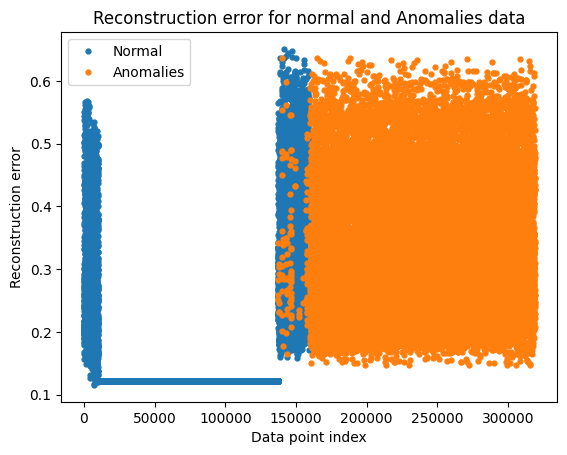

In [49]:
plt.figure(figsize=(18,10))
threshold_fixed = 0.150
groups = error_df.groupby('A')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalies" if name == 1 else "Normal")
#ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and Anomalies data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

#### Calculate RMSE and MAE   

In [51]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':')
print('')
# print('Mean Absolute Error: {:.4f}'.format(mae))
# print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')

The performance  of autoencoder:

Root Mean Square Error: 0.4934



### confusion_matrix

In [54]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.19
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['A'], error_df['pred']))
print(" Recall: ",recall_score(error_df['A'], error_df['pred']))
print(" Precision: ",precision_score(error_df['A'], error_df['pred']))
print(classification_report(error_df['A'], error_df['pred']))

[[26070  5894]
 [  702 31084]]
 Accuracy:  0.8965333333333333
 Recall:  0.9779148052601775
 Precision:  0.840607929038888
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89     31964
         1.0       0.84      0.98      0.90     31786

    accuracy                           0.90     63750
   macro avg       0.91      0.90      0.90     63750
weighted avg       0.91      0.90      0.90     63750



<Figure size 400x400 with 0 Axes>

In [55]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision
precision = precision_score(error_df['A'], error_df['pred'])

# Calculate recall
recall = recall_score(error_df['A'], error_df['pred'])

# Print the precision and recall scores
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.840607929038888
Recall: 0.9779148052601775


#### Mean p-Powered Error for auto encoder
- To enhance the perfomance of reall and precision   

In [56]:
test_x_predictions2 = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions2, 4), axis=1)
error_df_mean_power = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)
error_df_mean_power.head()

1993/1993 [==============================] - 2s 1ms/step


,Reconstruction_error,A
300453,0.383046,1.0
258530,0.459112,1.0
7696,0.341491,0.0
177325,0.856896,1.0
104886,0.103476,0.0


In [57]:
# find the maximum of each column using reconstruction error
maxValues2 = error_df_mean_power.max()

print(maxValues2)

Reconstruction_error    1.603285
A                       1.000000
dtype: float64


In [58]:

# To identify the maximum and minimum data point for identifying bins
import tensorflow as tf
# reconstruction loss for normal test data
#reconstructions = model.predict(normal_test_data)
train_loss2 = tf.keras.losses.mse(test_x_predictions2, x_good_test)


trainloss2=pd.DataFrame(train_loss2)
#trainloss.describe()
#trainloss.to_csv(r'/home/jovyan/trainloss.csv',index=False)
trainloss2.describe()


,0
count,63750.000000
mean,0.243452
std,0.126577
min,0.115618
25%,0.122104
50%,0.228688
75%,0.322561
max,0.650936


In [62]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
threshold_fixed = 0.2
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_mean_power.Reconstruction_error.values]
error_df_mean_power['pred'] =pred_y
conf_matrix = confusion_matrix(error_df_mean_power.A, pred_y)
plt.figure(figsize=(4, 4))

print(conf_matrix)
# sns.heatmap(conf_matrix, xticklabels=df1.A, yticklabels=df1.A, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show()

# print classification report
#print(classification_report(error_df.A, pred_y)

# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df_mean_power['A'], error_df_mean_power['pred']))
print(" Recall: ",recall_score(error_df_mean_power['A'], error_df_mean_power['pred']))
print(" Precision: ",precision_score(error_df_mean_power['A'], error_df_mean_power['pred']))
# print classification report
print(classification_report(error_df_mean_power['A'], error_df_mean_power['pred']))

[[26204  5760]
 [ 1273 30513]]
 Accuracy:  0.889678431372549
 Recall:  0.9599509217894671
 Precision:  0.8412042014721693
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     31964
         1.0       0.84      0.96      0.90     31786

    accuracy                           0.89     63750
   macro avg       0.90      0.89      0.89     63750
weighted avg       0.90      0.89      0.89     63750



<Figure size 400x400 with 0 Axes>